# Fundamentals of Probabilistic Data Mining - Lab 1
## Probabilistic Graphical Models
## Group:
- CERQUEIRA PONTE Joel (cerquejo)
- HUARTE SALAZAR Ricardo (huartesr)
- LUU Duc Anh (luud)
- SU Aimin (sua)

## *2.1.1 Simulated data*

Firstly, simulate a Gaussian model with the perfect map in Figure 2.1.1. To do this, use linear regression
models using offsets 0, the coefficients in the figure, and the residual standard deviation σ = 1. Simulate
one sample of size 40 and one sample of size 100.
Compare the gs and hc procedures (Scutari, 2010) using both sample sizes. What is your conclusion?

<img src="img/pgm.png" width="400">

In [2]:
set.seed(3)
suppressWarnings(suppressMessages(library(Rgraphviz, warn.conflicts = F)))
suppressWarnings(suppressMessages(library(bnlearn, warn.conflicts = F)))
suppressWarnings(suppressMessages(library(tidyverse, warn.conflicts = F)))

#### Sample size = 40

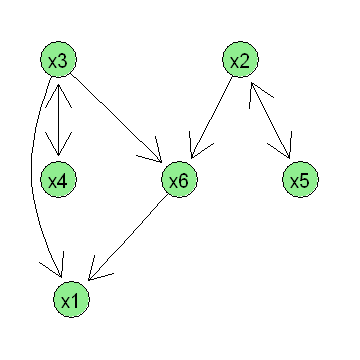

In [65]:
sample_size = 40

x1 = rnorm(sample_size, 0, 1)
x2 = rnorm(sample_size, 0, 1)
x3 = -x1 + rnorm(sample_size, 0, 1)
x4 = -2*x3 + rnorm(sample_size, 0, 1)
x5 = -x2 + rnorm(sample_size, 0, 1)
x6 = 2*x3 -x2 + x1 + rnorm(sample_size, 0, 1)

graph = data.frame(x1, x2, x3, x4, x5, x6)

res = gs(graph)
options(repr.plot.width=3, repr.plot.height=3)
#g1 <- graphviz.plot(res)
plot(g1, attrs = list(node = list(fontsize=4, fillcolor = "lightgreen")))

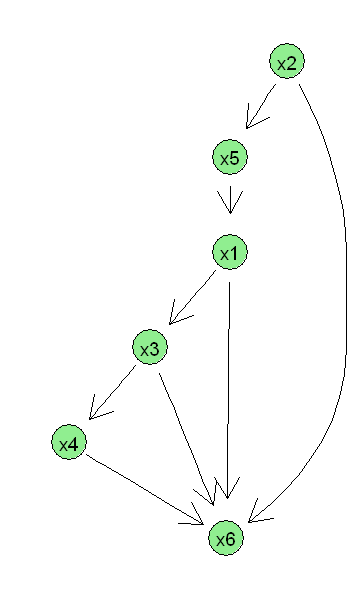

In [70]:
res = hc(graph)
#g2 <- graphviz.plot(res)
options(repr.plot.width=3, repr.plot.height=5)
plot(g2, attrs = list(node = list(fontsize=4, fillcolor = "lightgreen")))

#### Sample size = 100

In [45]:
defAttrs = getDefaultAttrs()
defAttrs$node$fontsize = 5

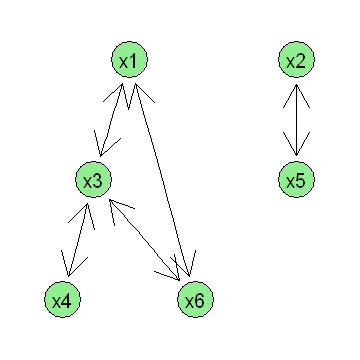

In [72]:
sample_size = 100

x1 = rnorm(sample_size, 0, 1)
x2 = rnorm(sample_size, 0, 1)
x3 = -x1 + rnorm(sample_size, 0, 1)
x4 = -2*x3 + rnorm(sample_size, 0, 1)
x5 = -x2 + rnorm(sample_size, 0, 1)
x6 = 2*x3 -x2 + x1 + rnorm(sample_size, 0, 1)

graph = data.frame(x1, x2, x3, x4, x5, x6)

res = gs(graph)
#g3 <- graphviz.plot(res)
options(repr.plot.width=3, repr.plot.height=3)
plot(g3, attrs = list(node = list(fontsize=4, fillcolor = "lightgreen")))

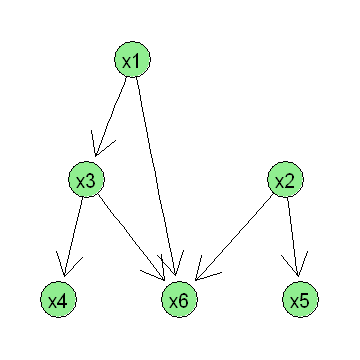

In [74]:
res = hc(graph)
#g4 <- graphviz.plot(res)
options(repr.plot.width=3, repr.plot.height=3)
plot(g4, attrs = list(node = list(fontsize=4, fillcolor = "lightgreen")))

Both algorithms yielded wrong graphs in the presence of small data. By increasing the amount of examples Hill-Climbing was able to find the correct graph.

## *2.1.2 Real data: asset returns*

*We consider the returns of 8 assets on n = 5, 039 days. The daily return Xt,i of asset i at time t is defined
as (Vt,i − Vt−1,i)/Vt−1,i, where Vt,i is the value of asset i at time t.
Here, we consider the assets "AIR.FRANCE.KLM", "ALCATEL.LUCENT" "AXA", "FAURECIA", "GAUMONT",
"GEODIS", "PPR" and "UNION.FINC.FRANC." only.*

#### *1) Use file "Returns250d.txt" to create a data frame with only the 8 assets listed above*

In [3]:
df = read.table("data/Returns250d.txt")
## selected listed columns
df = df %>% select(AIR.FRANCE.KLM, ALCATEL.LUCENT, AXA, FAURECIA, GAUMONT, GEODIS, PPR, UNION.FINC.FRANC.)
dim(df)
summary(df)
## deleting the NA columns
df = df[!is.na(df$GEODIS),]

[1] 5039    8

 AIR.FRANCE.KLM       ALCATEL.LUCENT            AXA            
 Min.   :-1.7635473   Min.   :-0.4845686   Min.   :-0.1426634  
 1st Qu.:-0.0063863   1st Qu.:-0.0121089   1st Qu.:-0.0103377  
 Median : 0.0000000   Median : 0.0000000   Median : 0.0000000  
 Mean   : 0.0000473   Mean   : 0.0000227   Mean   : 0.0003809  
 3rd Qu.: 0.0063091   3rd Qu.: 0.0121445   3rd Qu.: 0.0110617  
 Max.   : 1.3683165   Max.   : 0.3402577   Max.   : 0.1577519  
 NA's   :1            NA's   :1            NA's   :1           
    FAURECIA             GAUMONT               GEODIS          
 Min.   :-0.1309434   Min.   :-0.1257752   Min.   :-0.1380833  
 1st Qu.:-0.0090422   1st Qu.:-0.0080746   1st Qu.:-0.0089750  
 Median : 0.0000000   Median : 0.0000000   Median : 0.0000000  
 Mean   : 0.0003465   Mean   : 0.0002831   Mean   : 0.0001653  
 3rd Qu.: 0.0082032   3rd Qu.: 0.0082083   3rd Qu.: 0.0096252  
 Max.   : 0.2876657   Max.   : 0.1601739   Max.   : 0.1908418  
 NA's   :1            NA's   :1         

By inspecting the missing values, we can see that we can eliminate all of them but deleting the rows in which GEODIS is missing. This accounts for two rows out of 5039, so it will not impact the results substantially.

#### *2) Estimate directed graphs using the gs and hc procedures (Scutari, 2010) and plot their graphs.*

#### *Grow-Shrink*

Warning message in FUN(newX[, i], ...):
"vstructure AXA -> FAURECIA <- GAUMONT is not applicable, because one or both arcs are oriented in the opposite direction."Warning message in FUN(newX[, i], ...):
"vstructure AXA -> UNION.FINC.FRANC. <- GAUMONT is not applicable, because one or both arcs are oriented in the opposite direction."Warning message in FUN(newX[, i], ...):
"vstructure AXA -> ALCATEL.LUCENT <- GAUMONT is not applicable, because one or both arcs are oriented in the opposite direction."

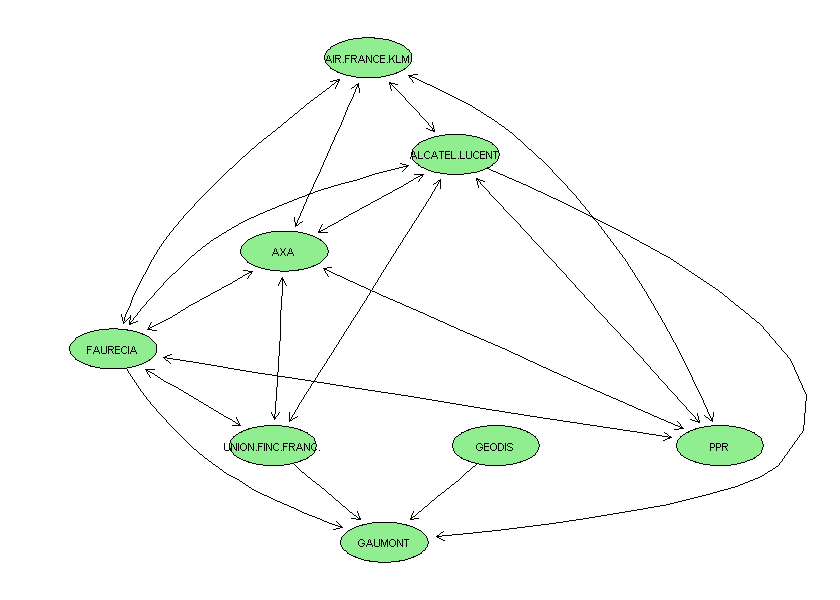

In [119]:
gr_gs = gs(df)
def = getDefaultAttrs()
#g5 <- graphviz.plot(gr_gs, shape = "ellipse")
options(repr.plot.width=7, repr.plot.height=5)
plot(g5, attrs = list(node = list(fillcolor = "lightgreen", fontsize=20, shape = "ellipse"), edge = list(arrowsize=0.5)))

#### Hill-Climbing

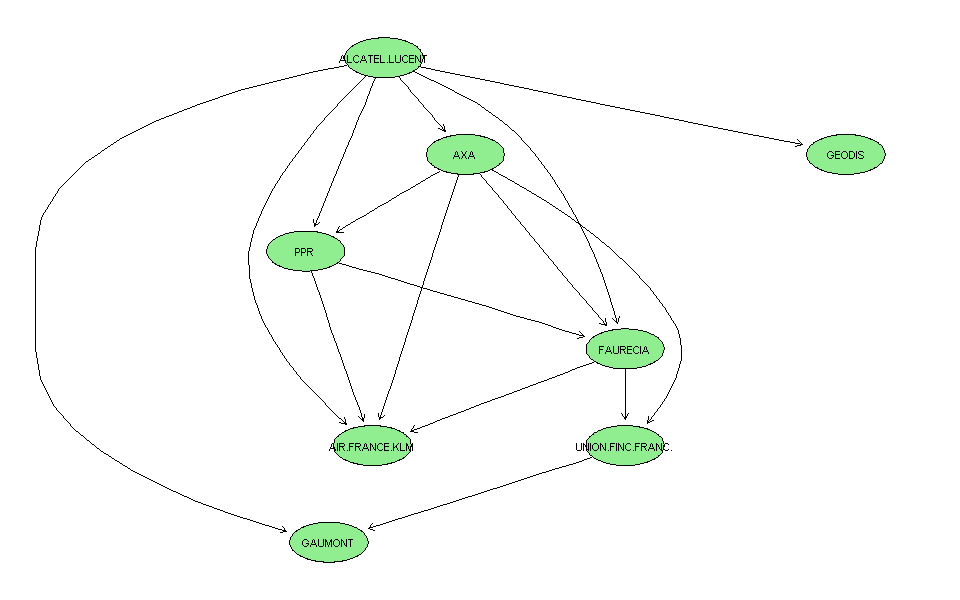

In [120]:
gr_hc = hc(df)
#g6 = graphviz.plot(gr_hc, shape = "ellipse")
options(repr.plot.width=8, repr.plot.height=5)
plot(g6, attrs = list(node = list(fillcolor = "lightgreen", fontsize=25, shape = "ellipse"), edge = list(arrowsize=0.5)))

#### *3) Find a marginal independence relationship between two variables found by gs but not by hc. Use ci.test to perform a statistical test of independence. What do you conclude?*

There is a "commond effect" pattern between GEODIS and UNION.FINC.FRANC. implied by gs(), which implies in marginal indepence. This is not seen in the graph generated by hc().

In [121]:
ci.test("GEODIS", "UNION.FINC.FRANC.", data = df)


	Pearson's Correlation

data:  GEODIS ~ UNION.FINC.FRANC.  
cor = 0.030559, df = 5035, p-value = 0.0301
alternative hypothesis: true value is not equal to 0


Considering a 95% confidence level, the small p-value indicates strong evidence against the null hypothesis, meaning that they are likely to not be marginally independent.

#### *4) Find a conditional independence relationship between two variables given another set of variables found by hc but not by gs. Use ci.test to perform a statistical test of (conditional) independence. What do you conclude?*

In [122]:
ci.test("GEODIS", "UNION.FINC.FRANC.", "ALCATEL.LUCENT", data = df)


	Pearson's Correlation

data:  GEODIS ~ UNION.FINC.FRANC. | ALCATEL.LUCENT
cor = 0.024625, df = 5034, p-value = 0.08058
alternative hypothesis: true value is not equal to 0


The high p-value prevents us from rejecting the null hypothesis, giving evidence that the conditional independence is true

#### *5) Find a conditional independence relationship between two variables given another set of variables found by both hc and gs. Use ci.test to perform a statistical test of (conditional) independence. What do you conclude?*

In [123]:
ci.test("UNION.FINC.FRANC.", "GEODIS", c("FAURECIA", "ALCATEL.LUCENT", "AXA"), df)


	Pearson's Correlation

data:  UNION.FINC.FRANC. ~ GEODIS | FAURECIA + ALCATEL.LUCENT + AXA
cor = 0.020541, df = 5032, p-value = 0.1451
alternative hypothesis: true value is not equal to 0


Again, the high p-value prevents us from rejecting the null hypothesis, giving evidence that the conditional independence is true

## *2.2 Mandatory additional questions*

#### *1. Give a formal definition of consistent directed PGM estimation. Write some state-of-the-art on that topic, choose one of the references therein, justifying your choice. Provide a one-page description of the approach developed in that reference.*

#### *2. Apply the chosen approach to the asset returns data set. Compare it with the results of hc in part 2.1.2. Use ci.test to try to evaluate the relevance of proposals for edges where both methods yield different results.*

## *2.3 Optional additional questions*

#### *1. Imagine, describe and implement a protocol to evaluate consistency of any arbitrary directed PGM estimation method. Test this protocol on the method chosen in part 2.2 and provide the result. What is your conclusion? What is the effect of the number of variables?*

#### *2. What are the assumption of the method chosen in part 2.2? Check as many assumptions as you can on the asset returns data set.*

#### *3. Define and simulate some 4-variable model that cannot have a perfect directed map. Estimate a directed PGM using the method chosen in part 2.2. What do you obtain? Why? (How to interpret this result?)*

#### *4. If two methods claim to be consistent but yield different DAGs on a same data set, how would you used both graph to propose a new graph? What would the expected properties of that graph be?*